In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

# Kmeans

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [3]:
# Prepara os dados de entrada do estimador
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X)

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 3 0 3 2 2 1 0 3 3 1 3 0 3 2 0 0 2 1 1 2 2 0 1 1 0 2 0 1 0 3 3 0 3 3 3 3
 3 1 2 0 1 0 0 1 1 3 1 3 2 1 2 3 2 2 1 3 1 3 2 3 0 3 1 1 1 3 2 3 1 0 1 3 1
 1 3 1 0 2 3 2 0 2 2 3 0 2 0 3 3 0 2 3 1 1 0 2 2 0 1 3 2 3 2 0 2 2 0 3 0 1
 1 2 3 2 0 3 2 2 0 1 2 1 2 2 2 2 1 2 1 3 1 1 2 3 1 1 3 0 3 3 1 0 1 0 1 3 0
 3 3 3 0 3 0 2 1 3 1 2 0 3 0 0 2 0 1 1 0 2 0 0 3 2 0 1 3 2 2 0 1 2 0 1 1 0
 0 0 0 2 3 0 1 0 0 1 1 1 0 1 3 0 1 2 1 0 3 1 3 0 3 0 1 0 0 3 1 1 2 2 0 3 2
 2 1 2 1 0 3 3 0 0 3 0 2 1 0 2 1 3 1 2 0 2 3 3 3 3 1 1 3 0 1 2 0 1 1 1 2 2
 3 0 0 1 2 3 1 0 3 0 2 2 1 1 0 2 2 2 0 3 3 2 2 0 2 2 2 3 1 3 0 2 2 3 3 3 2
 2 0 3 1]
[[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


## Visualizando os Clusteres

In [6]:
import matplotlib.pyplot as plt


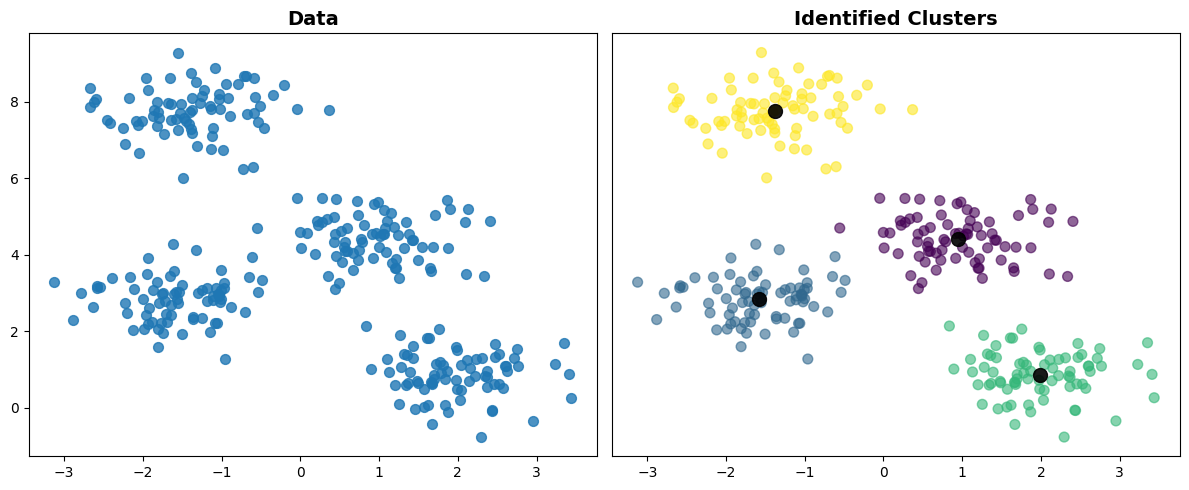

In [7]:
f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Data', fontsize=14, weight='bold')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, c=labels)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.9);
plt.yticks([])

plt.tight_layout()
plt.show()


Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

## Exemplo

In [10]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

## Exemplo 2

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 2 0 2 1 1 1 2 0 1 3 2 1 3 1 0 0 3 0 1 2 1 0 1 3 1 2 3 2 2 2 0 3 1 1 1
 1 1 0 3 0 2 1 3 1 1 3 1 1]
[[ 1.19825217 -0.7863109 ]
 [-0.5352834   0.43337823]
 [ 0.74030529  1.10682426]
 [-1.0975732  -1.23182081]]


In [14]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2


/tmp/ipykernel_41534/3223419927.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],


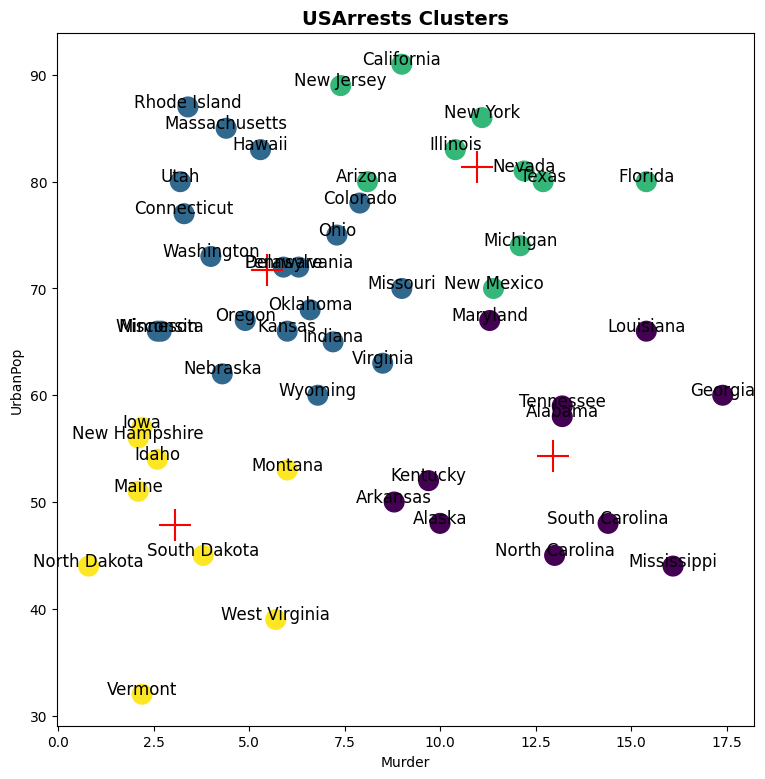

In [15]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' , marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 2 0 2 2 2 2 2 0 2 1 2 2 1 2 0 0 1 0 2 2 1 0 2 1 1 2 1 2 2 2 0 1 2 2 1
 2 2 0 1 0 2 2 1 2 2 1 1 1]
[[ 1.19825217 -0.7863109 ]
 [-0.99780855 -0.82528295]
 [ 0.03154183  0.80813524]]


In [21]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


/tmp/ipykernel_41534/1268345996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],


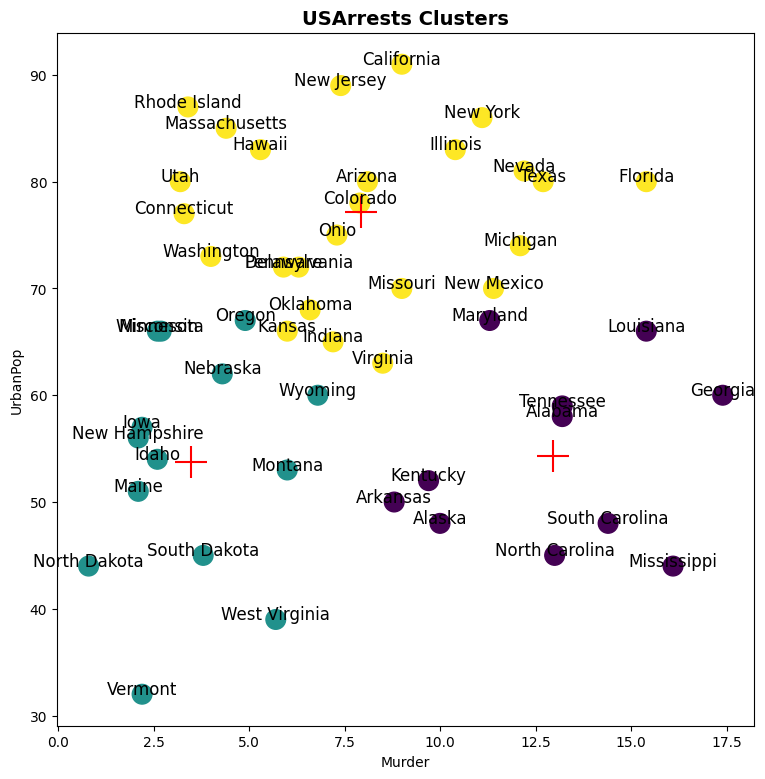

In [22]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## Qual o número ideal de Clusters?

### Método do Cotovelo

Antes de prosseguirmos você deve ter notado que até aqui escolhemos arbitrariamente o número de clusters. Como determinar o número ideal de Clusters?  

Um primeiro método é conhecido como método do cotovelo (*elbow method*).
A inércia mede o quanto um conjunto de dados foi agrupado pelo KMédias, ela é a própria variação total dos clusters que vimos acima $Within(C_k)$. Mas um bom modelo deve ter uma baixa inércia, mas também um baixo número de clusters $k$. Desse modo precisamos buscar uma compensação porque a medida de o número de clusters aumenta, a inércia diminui. A ideia, então, é buscar o ponto onde a diminuição da inércia começa a diminuir, o *cotovelo* da curva.


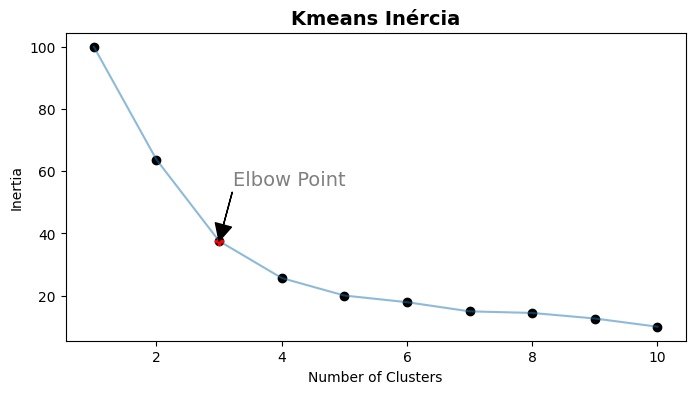

In [18]:
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

### Método da Silhueta

Outro método que pode ser empregado é o método de cálculo da silhueta. A silhueta é uma medida estatística de quanto um elemento é semelhante ao seu próprio cluster (coesão) em comparação com outros clusters (separação). A silhueta é um valor que varia de $-1$ a $+1$, onde um valor alto indica que o elemento está bem combinado com seu próprio aglomerado e mal combinado com os aglomerados vizinhos. Se a maioria dos elementos tiver um valor alto, a configuração de cluster é apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters.

O método consiste, portanto, em empregarmos o número de cluster que fornece a maior silhueta média  de todos os grupos.

In [19]:
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.339
Silhueta média para 3 clusters:  0.372
Silhueta média para 4 clusters:  0.385
Silhueta média para 5 clusters:  0.376
Silhueta média para 6 clusters:  0.366
Silhueta média para 7 clusters:  0.353
Silhueta média para 8 clusters:  0.322
Silhueta média para 9 clusters:  0.3
Silhueta média para 10 clusters:  0.349


### Exemplo

Em ambos os metodos é indicado usar o k = 2

In [23]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

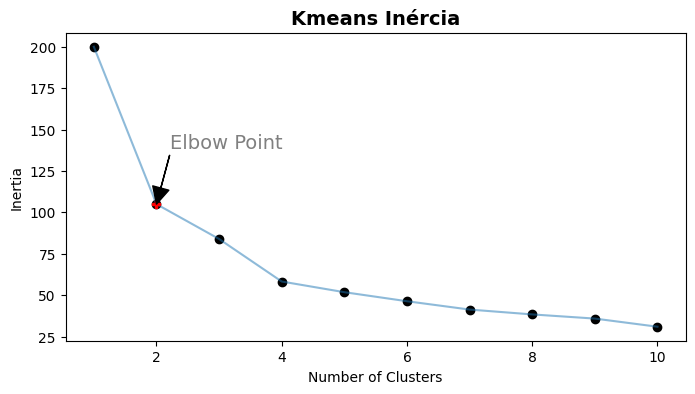

In [25]:
inertia = inercia(X,1,10)
plt.plot(2 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (2 , inertia[1]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

In [26]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.408
Silhueta média para 3 clusters:  0.365
Silhueta média para 4 clusters:  0.338
Silhueta média para 5 clusters:  0.342
Silhueta média para 6 clusters:  0.259
Silhueta média para 7 clusters:  0.243
Silhueta média para 8 clusters:  0.207
Silhueta média para 9 clusters:  0.208
Silhueta média para 10 clusters:  0.227


#### resolvendo com k=2

In [27]:
from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador
clf = KMeans(n_clusters = 2 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]
[[ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.67675778 -0.68274685 -0.13306084 -0.57037591]]


In [28]:
df['Cluster'] = labels
print(df.head())

            Murder  Assault  UrbanPop  Rape  Cluster
rownames                                            
Alabama       13.2      236        58  21.2        0
Alaska        10.0      263        48  44.5        0
Arizona        8.1      294        80  31.0        0
Arkansas       8.8      190        50  19.5        1
California     9.0      276        91  40.6        0


## Cuidado - tamanho do cluster

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos).

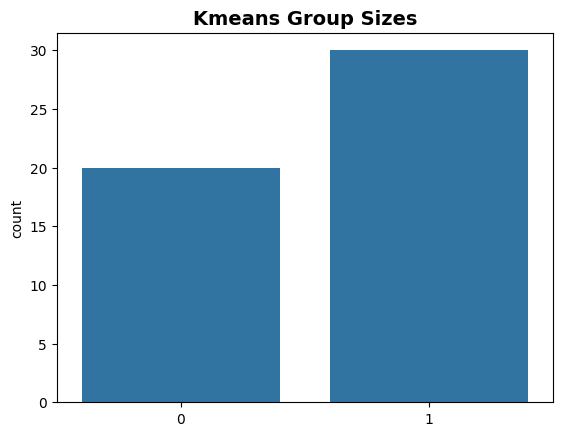

In [32]:
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()

In [33]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


In [34]:
scaler.inverse_transform(centroids)

array([[ 12.165     , 255.25      ,  68.4       ,  29.165     ],
       [  4.87      , 114.43333333,  63.63333333,  15.94333333]])

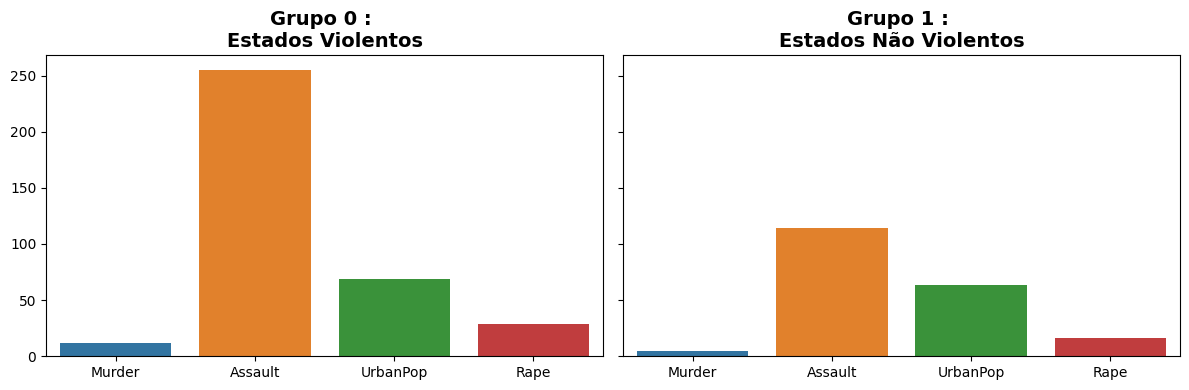

In [35]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

nomes = ['Estados Violentos','Estados Não Violentos']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



/tmp/ipykernel_41534/190801523.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],


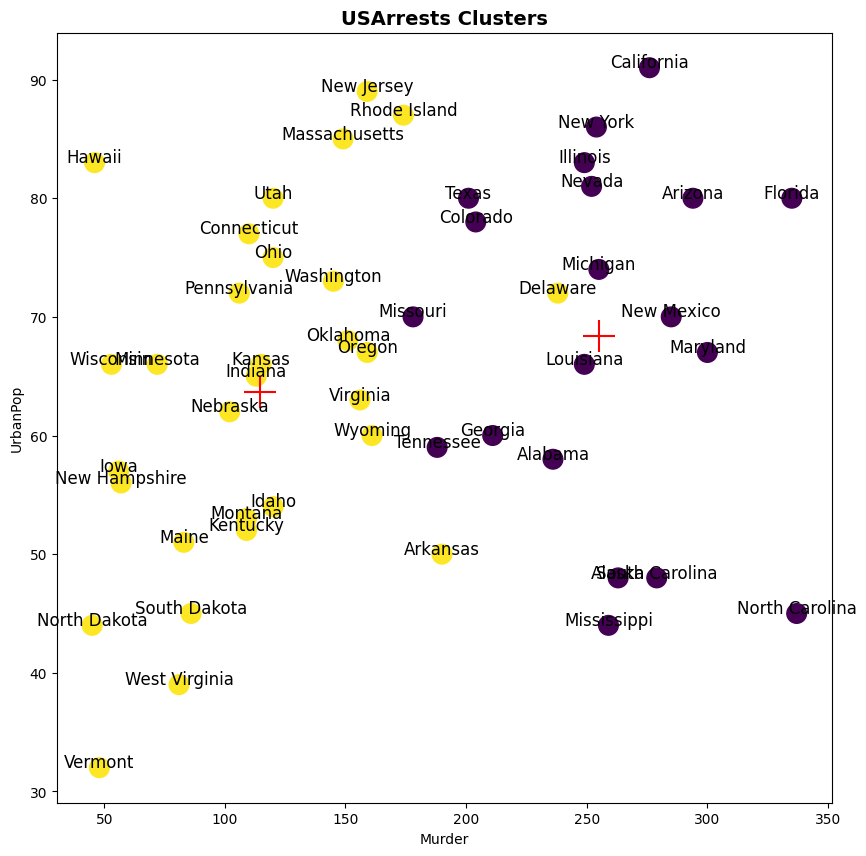

In [36]:
f = plt.figure(figsize=(10,10))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter( x = 'Assault' ,y = 'UrbanPop' , data = df , c = df.Cluster , s = 200 )
plt.scatter(x = real_centroids[: , 1] , y =  real_centroids[: , 2] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
     plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],
              horizontalalignment='center',
              size='large',
              color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Clustering Hierárquico

A ideia da clusterização hierárquica é a mesma do Kmédias. Mas o seu algoritmo parte de princípios bastante diferentes produzindo assim agrupamentos de dados que podem divergir bastante dependendo dos dados.  

A clusterização hierárquica busca construir uma hierarquia de clusters e existem normalmente duas estratégias:

* No *Cluster Aglomerativo* os agrupamentos são feitos de "de baixo para cima", cada amostra começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

* No *Cluster Divisivo*, a construção é "de cima para baixo", com todas as amostras começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

O resultado do agrupamento hierárquico fornece uma estrutura que organiza os itens de dados em um *dendrograma*.



## Dendograma

A base para a construção do dendograma é uma matriz de distância entre todas as amostras dos dados e a  figura abaixo ilustra o procedimento de construção do Cluster Aglomerativo. Esse foi aqui adaptado de STAT 555 **Statistical Analysis of Genomics Data**. Os itens de dados aparecem no eixo $x$ e as distâncias das amostras no eixo $y$. Na construção Aglomerativa partimos dos elementos individuais (distância $0$) e vamos *lingando* os dados a partir das menores distâncias para as maiores. Assim, o par de amostras $(3,5)$ é o primeiro a ser *ligado*, pois tem a menor distância entre todos os elementos, o $1$ é ligado em seguida e assim por diante até o dendograma ligar todas as amostras dos dados. A construção pode empregar a distância euclidiana mas também qualquer ou métrica de distância.



## Definição  dos Clusters

Construído o Dendograma a definição dos Clusters pode ser feita estabelecendo-se um *ponto de corte* no dendograma, o que define a distância máxima que os elementos terão dentro de um agrupamento.

